<h1>hw</h1>
<h3>PolynomialFeature을 이용하여 과대 적합을 유도한 후 Ridge / Lasso 추가</h3>

<h2>Dataset 로드 및 내용 확인</h2>

In [432]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 
from sklearn.datasets import load_linnerud

In [433]:
import warnings

warnings.filterwarnings('ignore')

In [434]:
linnerud = load_linnerud()

In [435]:
print(linnerud.target_names)

['Weight', 'Waist', 'Pulse']


In [436]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [437]:
df = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)

In [438]:
df_target = pd.DataFrame(linnerud.target, columns = linnerud.target_names)

In [439]:
data = pd.concat([df, df_target], axis=1)

In [440]:
data

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [441]:
data.drop(columns=['Weight', 'Waist'], inplace=True)

In [442]:
data.columns

Index(['Chins', 'Situps', 'Jumps', 'Pulse'], dtype='object')

In [443]:
data.shape

(20, 4)

In [444]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Pulse   20 non-null     float64
dtypes: float64(4)
memory usage: 768.0 bytes


In [445]:
data['Pulse'] = linnerud.target

In [446]:
data.head()

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0


<h2>EDA</h2>

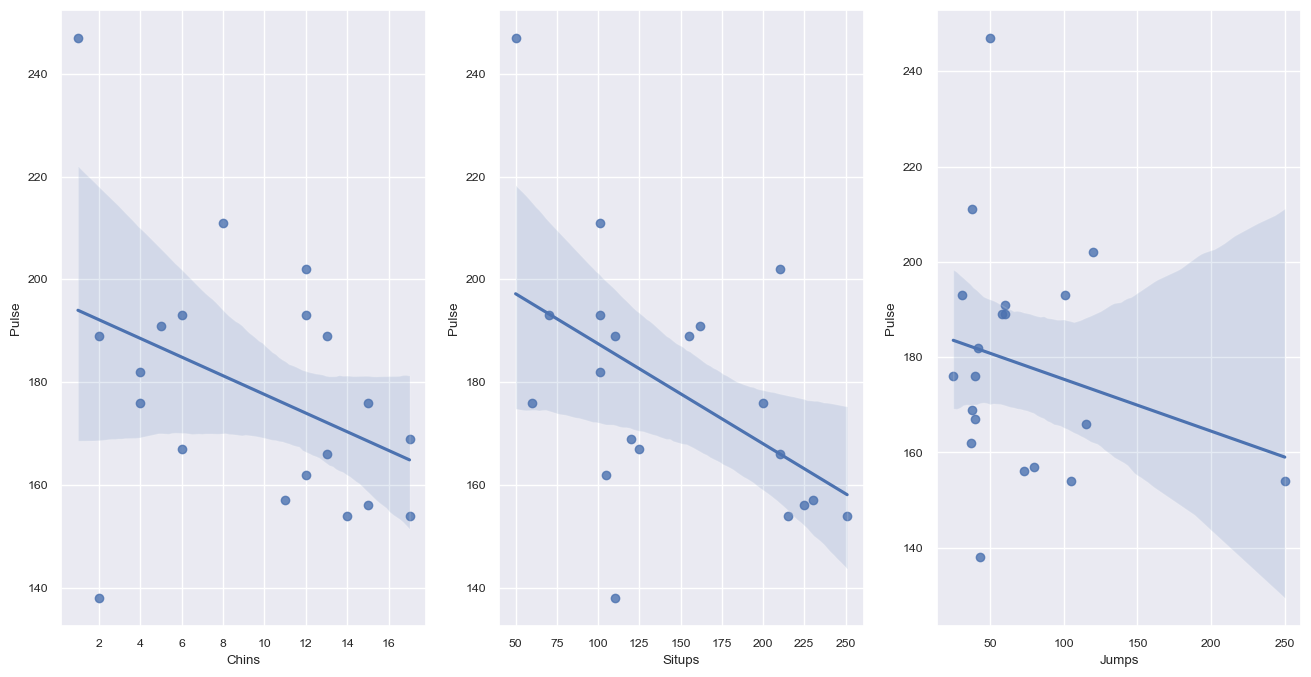

In [447]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=3)

lm_features = ['Chins', 'Situps', 'Jumps']

for i, feature in enumerate(lm_features):
    sns.regplot(x=feature, y='Pulse', data=data, ax=axs[i])

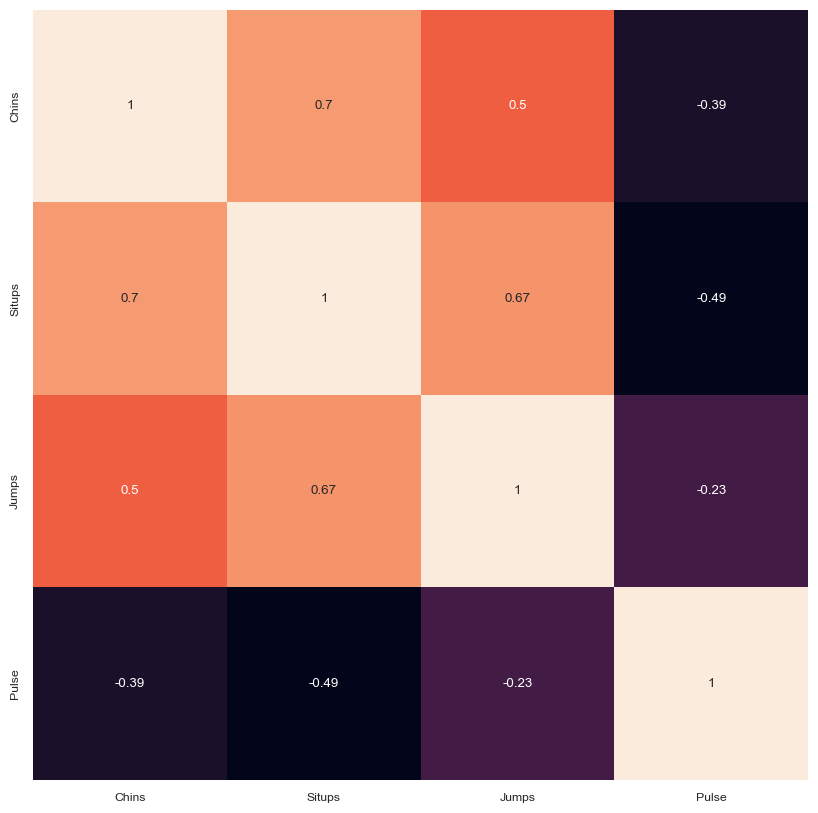

In [448]:
df_corr=data.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [449]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [450]:
from sklearn.model_selection import train_test_split

x_data=data.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=data.loc[:, 'Pulse']
X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [451]:
X_train.head()

,Chins,Situps,Jumps
14,6.0,70.0,31.0
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0


In [452]:
y_train.head()

14    193.0
16    176.0
10    169.0
8     176.0
5     182.0
Name: Pulse, dtype: float64

<h2>Regression Befoe Inducing Overfitting</h2>

In [453]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<h3>SVR</h3>

In [454]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=12)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.25


In [455]:
## confusion metrix
cm_svm = confusion_matrix(y_test, pred_svm)

print(cm_svm)

[[0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


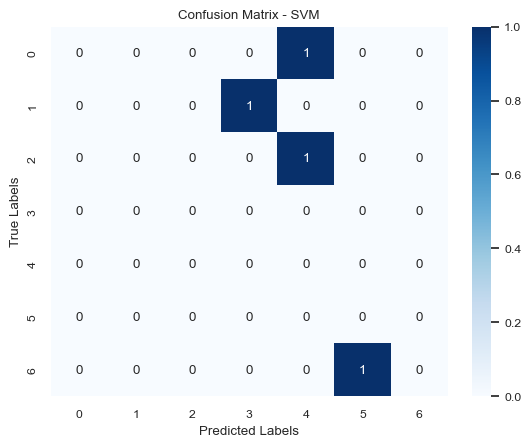

In [456]:
sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<h3>DT</h3>

In [457]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=12)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


In [458]:
## confusion metrix
cm_dt = confusion_matrix(y_test, pred_dt)

print(cm_dt)

[[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


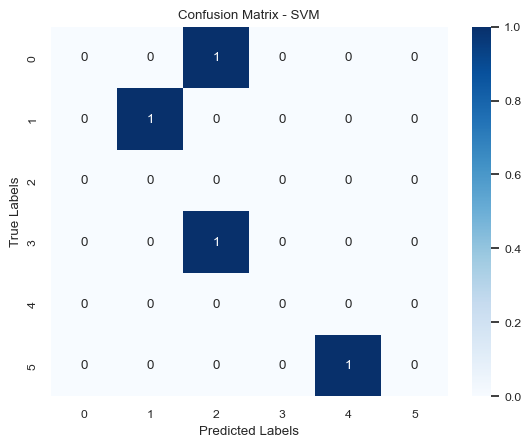

In [459]:
sns.heatmap(cm_dt, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<h3>RT</h3>

In [460]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=12)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

1.0


In [461]:
## confusion metrix
cm_rf = confusion_matrix(y_test, pred_dt)

print(cm_rf)

[[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


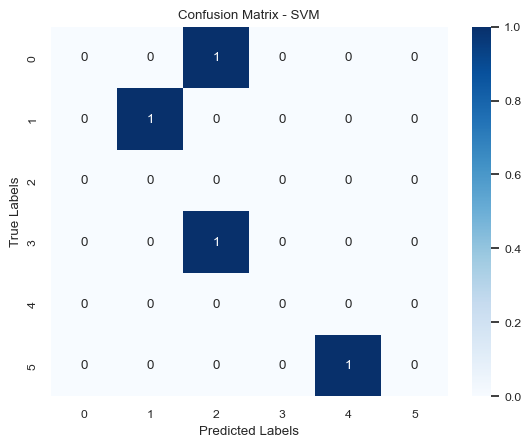

In [462]:
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<h3>LR</h3>

In [463]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=12)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.6875


In [464]:
## confusion metrix
cm_lr = confusion_matrix(y_test, pred_dt)

print(cm_lr)

[[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


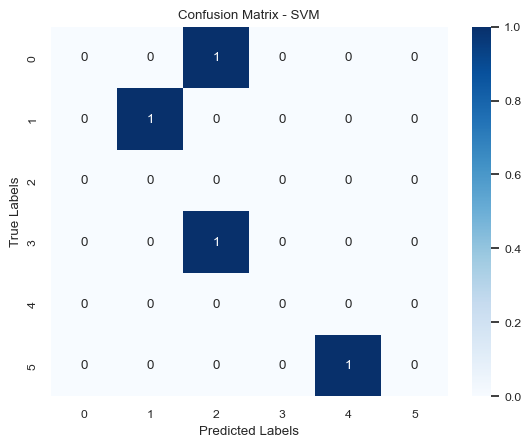

In [465]:
sns.heatmap(cm_lr, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<h3>Linear Regression</h3>

In [466]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [467]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) 
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [-1.  -0.1  0.2]
상수항(절편): 200.7


In [468]:
linear_y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [469]:
mse = mean_squared_error(y_test, linear_y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, linear_y_preds):.3f}')

MSE : 1559.793, RMSE: 39.494
Variance score : 0.115


In [470]:
print("절편 값:", lr.intercept_)

print("회귀계수:", np.round(lr.coef_,1))

절편 값: 200.65050193110943
회귀계수: [-1.  -0.1  0.2]


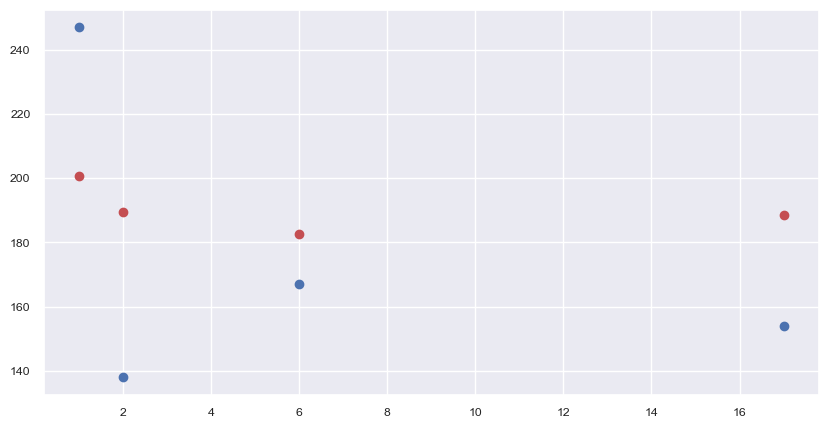

In [471]:
linear_y_preds = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], linear_y_preds, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    

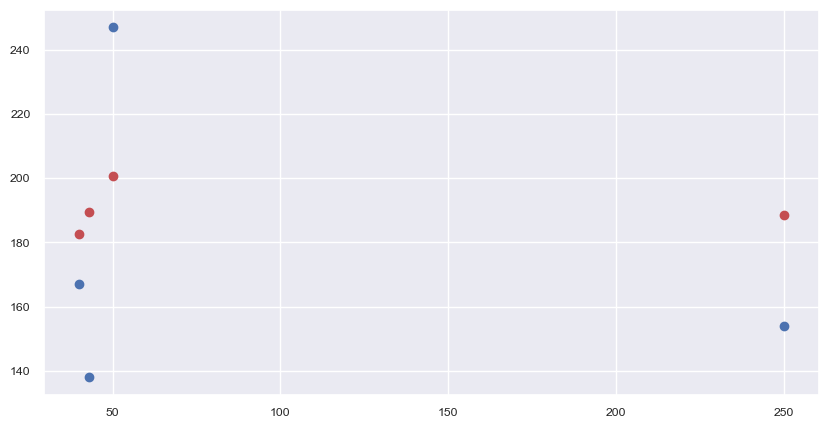

In [472]:
linear_y_preds = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Jumps'], y_test, label='y_test')
plt.scatter(X_test['Jumps'], linear_y_preds, c='r', label='y_pred')
plt.show()  

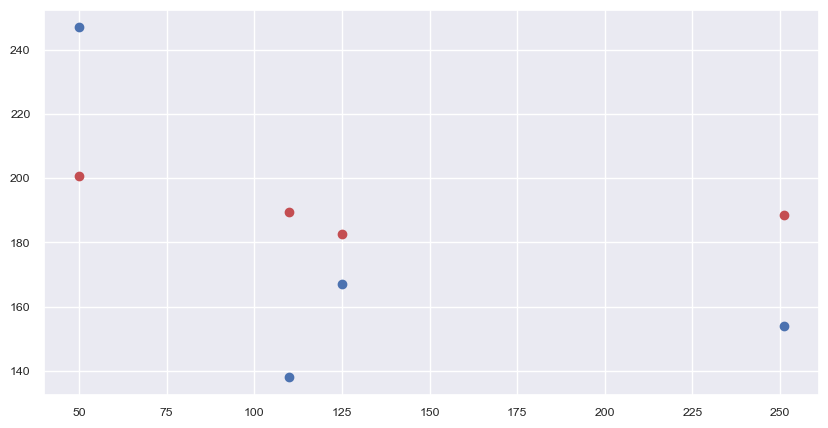

In [473]:
linear_y_preds = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], linear_y_preds, c='r', label='y_pred')
plt.show() 

<h2>Induce Overfitting</h2>

In [474]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [475]:
poly = PolynomialFeatures(degree=15)
poly.fit(x_data)
train_poly = poly.fit_transform(x_data)

print(train_poly.shape)

(20, 816)


In [476]:
X_train, X_test, y_train, y_test=train_test_split(train_poly, y_data, test_size=0.2, shuffle=True, random_state=12)

In [477]:
scaler = StandardScaler()

scaled_train_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.transform(X_test)

In [478]:
poly_lr = LinearRegression()
poly_lr.fit(scaled_train_X, y_train)

LinearRegression()

<h2>Evaluate Model</h2>

<h3>Regression / Confusion Matrix</h3>

In [479]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
## from sklearn.metrics import accuracy_score

<h3>SVR</h3>

In [480]:
from sklearn.svm import SVC

clf_svm = SVC(kernel='rbf', C=1e3, gamma=0.1)
clf_svm.fit(scaled_train_X, y_train)

pred_svm = clf_svm.predict(scaled_test_X)

print(clf_svm.score(scaled_train_X, y_train))

1.0


In [481]:
## confusion metrix
cm_svm = confusion_matrix(y_test, pred_svm)

print(cm_svm)

[[0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]


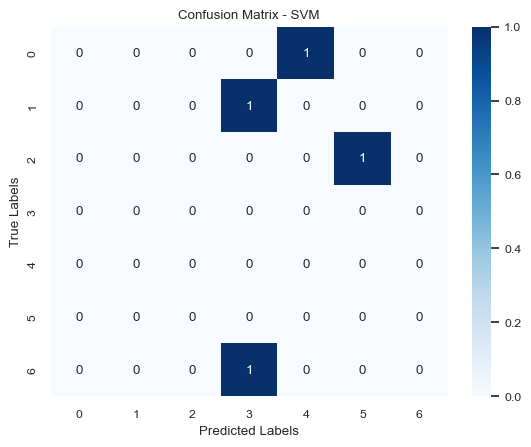

In [482]:
sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<h3>DT</h3>

In [483]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth=5, random_state=12)
clf_dt.fit(scaled_train_X, y_train)

pred_dt = clf_dt.predict(scaled_test_X)

print(clf_dt.score(scaled_train_X, y_train))

0.75


In [484]:
## confusion metrix
cm_dt = confusion_matrix(y_test, pred_dt)

print(cm_dt)

[[0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


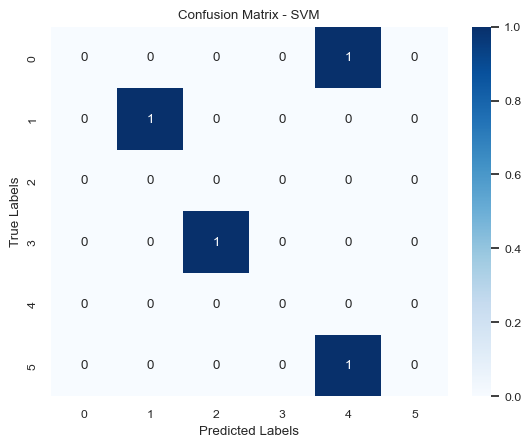

In [485]:
sns.heatmap(cm_dt, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<h3>RT</h3>

In [486]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=12)
rf_clf.fit(scaled_train_X, y_train)
pred_rf = rf_clf.predict(scaled_test_X)

print(rf_clf.score(scaled_train_X, y_train))

1.0


In [487]:
## confusion metrix
cm_rf = confusion_matrix(y_test, pred_rf)

print(cm_dt)

[[0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


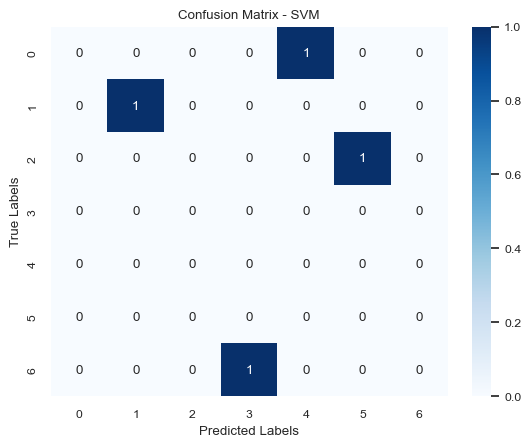

In [488]:
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<h3>LR</h3>

In [489]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_lr.fit(scaled_train_X, y_train)

pred_lr = clf_lr.predict(scaled_test_X)

print(clf_lr.score(scaled_train_X, y_train))

0.9375


In [490]:
## confusion metrix
cm_lr = confusion_matrix(y_test, pred_lr)

print(cm_lr)

[[0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]


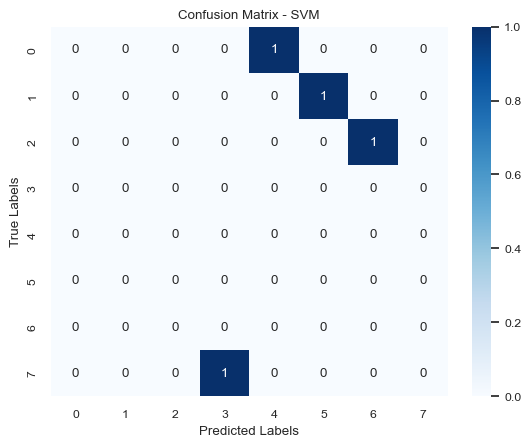

In [491]:
sns.heatmap(cm_lr, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<h3>Linear Regression</h3>

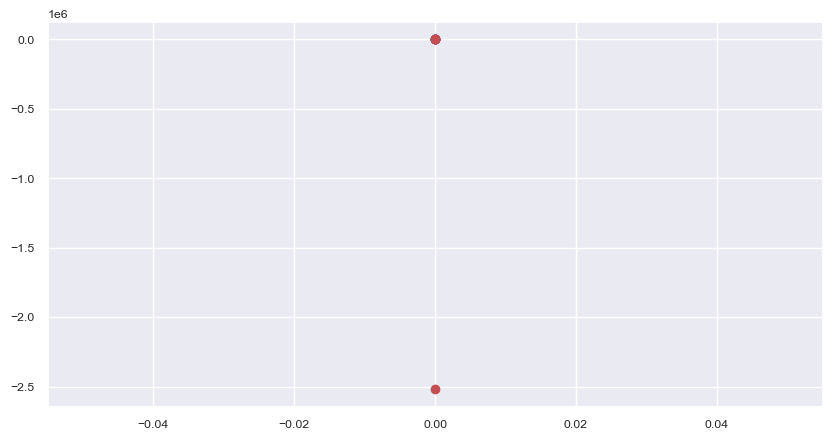

In [492]:
linear_y_preds = poly_lr.predict(scaled_test_X)

plt.figure(figsize=(10,5))
plt.scatter(scaled_test_X[:, 0], y_test, label='y_test')
plt.scatter(scaled_test_X[:, 0], linear_y_preds, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

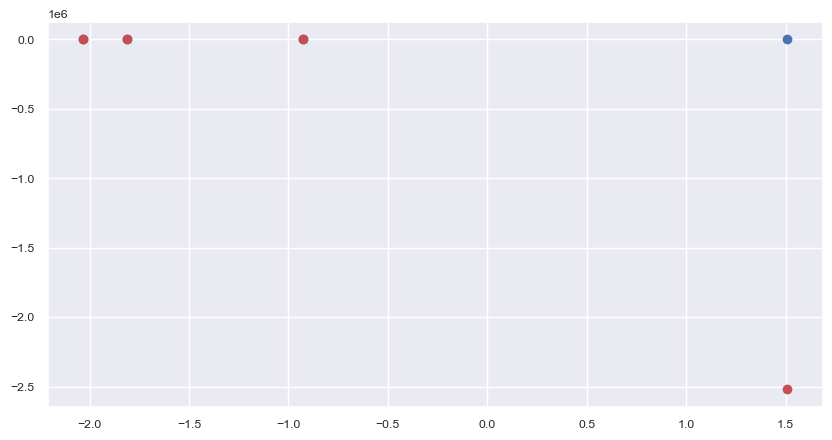

In [493]:
linear_y_preds = poly_lr.predict(scaled_test_X)

plt.figure(figsize=(10,5))
plt.scatter(scaled_test_X[:, 1], y_test, label='y_test')
plt.scatter(scaled_test_X[:, 1], linear_y_preds, c='r', label='y_pred')
plt.show()   

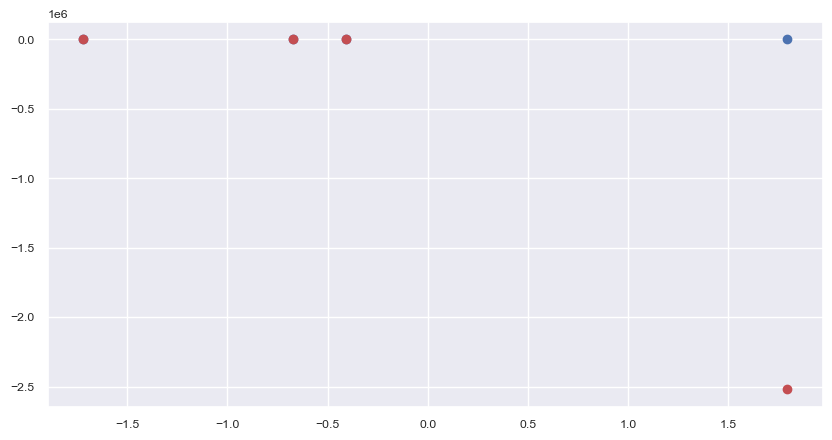

In [494]:
linear_y_preds = poly_lr.predict(scaled_test_X)

plt.figure(figsize=(10,5))
plt.scatter(scaled_test_X[:, 2], y_test, label='y_test')
plt.scatter(scaled_test_X[:, 2], linear_y_preds, c='r', label='y_pred')
plt.show()   

In [495]:
print("회귀계수(기울기):", np.round(poly_lr.coef_, 1)) 
print("상수항(절편):", np.round(poly_lr.intercept_, 1))

회귀계수(기울기): [ -0.   13.4 -21.    7.   13.9  26.9   2.5 -13.3   7.1  26.3 -14.   25.8
  12.4  17.7  10.    0.8 -12.7   0.8  14.7  23.1 -32.3   4.7  -0.   19.4
  14.1   4.3   8.7   6.5   3.2  -1.  -12.7  -4.2   5.1  11.9  14.6 -36.3
 -10.8 -13.4   8.6   6.7   1.   12.    9.9   5.3  -0.5   3.2   2.8   2.
   0.5  -2.3 -11.8  -6.6  -0.3   4.6   7.3   7.3 -31.4 -16.7 -19.8  -0.4
  -1.2  -3.9   7.3   6.5   3.6  -1.    7.    6.1   4.    1.2  -2.6   0.4
   0.5   0.6   0.4  -0.7  -3.  -10.2  -7.   -2.8   0.8   3.    3.7   2.6
 -22.9 -15.8 -19.6  -4.6  -5.6  -7.2   2.8   2.5   0.9  -2.4   5.3   4.9
   3.4   1.1  -2.4   3.9   3.5   2.7   1.4  -0.4  -3.3  -0.8  -0.6  -0.1
   0.1  -0.2  -1.1  -3.2  -8.2  -6.3  -3.5  -1.    0.8   1.6   1.4  -0.1
 -14.1 -11.7 -15.5  -5.1  -6.6  -8.1   0.3  -0.   -1.   -3.4   3.    2.9
   2.    0.4  -2.5   3.4   3.3   2.6   1.5  -0.2  -2.9   2.    1.9   1.7
   1.2   0.4  -1.   -3.3  -1.2  -1.   -0.5  -0.1   0.   -0.3  -1.2  -3.1
  -6.2  -5.2  -3.4  -1.5  -0.2   0.5   0.

In [496]:
linear_y_preds = poly_lr.predict(scaled_test_X)

print(scaled_train_X.shape, scaled_test_X.shape)

(16, 816) (4, 816)


In [497]:
mse = mean_squared_error(y_test, linear_y_preds)

rmse = np.sqrt(mse)

In [498]:
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, linear_y_preds):.3f}')

MSE : 1587869331110.589, RMSE: 1260106.873
Variance score : -901046576.450


In [499]:
print("절편 값:", poly_lr.intercept_)

print("회귀계수:", np.round(poly_lr.coef_,1))

절편 값: 179.125
회귀계수: [ -0.   13.4 -21.    7.   13.9  26.9   2.5 -13.3   7.1  26.3 -14.   25.8
  12.4  17.7  10.    0.8 -12.7   0.8  14.7  23.1 -32.3   4.7  -0.   19.4
  14.1   4.3   8.7   6.5   3.2  -1.  -12.7  -4.2   5.1  11.9  14.6 -36.3
 -10.8 -13.4   8.6   6.7   1.   12.    9.9   5.3  -0.5   3.2   2.8   2.
   0.5  -2.3 -11.8  -6.6  -0.3   4.6   7.3   7.3 -31.4 -16.7 -19.8  -0.4
  -1.2  -3.9   7.3   6.5   3.6  -1.    7.    6.1   4.    1.2  -2.6   0.4
   0.5   0.6   0.4  -0.7  -3.  -10.2  -7.   -2.8   0.8   3.    3.7   2.6
 -22.9 -15.8 -19.6  -4.6  -5.6  -7.2   2.8   2.5   0.9  -2.4   5.3   4.9
   3.4   1.1  -2.4   3.9   3.5   2.7   1.4  -0.4  -3.3  -0.8  -0.6  -0.1
   0.1  -0.2  -1.1  -3.2  -8.2  -6.3  -3.5  -1.    0.8   1.6   1.4  -0.1
 -14.1 -11.7 -15.5  -5.1  -6.6  -8.1   0.3  -0.   -1.   -3.4   3.    2.9
   2.    0.4  -2.5   3.4   3.3   2.6   1.5  -0.2  -2.9   2.    1.9   1.7
   1.2   0.4  -1.   -3.3  -1.2  -1.   -0.5  -0.1   0.   -0.3  -1.2  -3.1
  -6.2  -5.2  -3.4  -1.5  -0.2  

<h2>Ridge / Lasso</h2>

In [500]:
from sklearn.linear_model import Ridge, Lasso

<h3>Find Suitable Alpha value</h3>

In [501]:
ridge_score = []
lasso_score = []
alpha = [0.001,0.01,0.1,1,10]

for a in alpha:
  ridge = Ridge(alpha = a)
  lasso = Lasso(alpha = a)

  ridge.fit(scaled_train_X, y_train)
  lasso.fit(scaled_train_X, y_train)

  ridge_y_preds = ridge.predict(scaled_test_X)
  lasso_y_preds = lasso.predict(scaled_test_X)

  ridge_r2_score = r2_score(y_test, ridge_y_preds)
  lasso_r2_score = r2_score(y_test, lasso_y_preds)
  
  ridge_score.append(ridge_r2_score)
  lasso_score.append(lasso_r2_score)

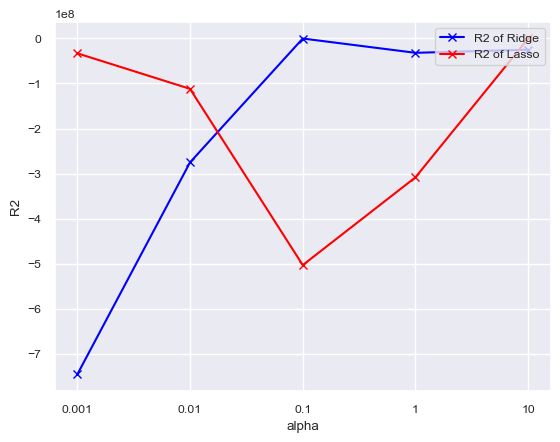

In [502]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(5), ridge_score, '-x', c='blue', label="R2 of Ridge")
ax.plot(range(5), lasso_score, '-x', c='red', label="R2 of Lasso")

plt.xticks(range(5), alpha)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend(loc='upper right')
plt.show()

<h3>Prediction</h3>

In [503]:
ridge_alpha = 0.1
lasso_alpha = 0.1

ridge = Ridge(alpha = ridge_alpha)
lasso = Lasso(alpha = lasso_alpha)

In [504]:
ridge.fit(scaled_train_X, y_train)
lasso.fit(scaled_train_X, y_train)

Lasso(alpha=0.1)

In [505]:
ridge_y_preds = ridge.predict(scaled_test_X)
lasso_y_preds = lasso.predict(scaled_test_X)

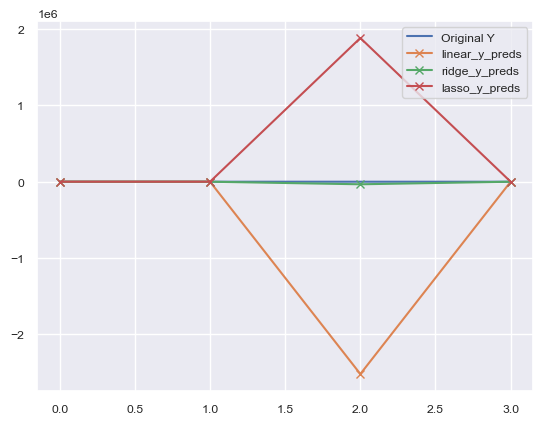

In [506]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), linear_y_preds, '-x', label="linear_y_preds")
ax.plot(range(len(y_test)), ridge_y_preds, '-x', label="ridge_y_preds")
ax.plot(range(len(y_test)), lasso_y_preds, '-x', label="lasso_y_preds")

plt.legend(loc='upper right')
plt.show()